In [ ]:
#!pip install keras_self_attention
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import Adam
#from keras_self_attention import SeqSelfAttention
import os
import seaborn as sns
from tensorflow.keras import callbacks as cbks
import torch
import torch.utils.data as data
from scipy.special import softmax
#from torchvision import datasets, transforms
#from sampling import DataLoader, CSVDataset
#from sampling import transforms as tx
from sklearn.preprocessing import StandardScaler,MinMaxScaler


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
x_train=np.zeros((2000,50,32))
y_train=np.zeros((2000,50,32))
x_test=y_test=np.zeros((500,50,32))
c=np.zeros((500,50,32))
#y=np.zeros((120,128,128))
for i in range(2000):
  df=np.load("/content/drive/My Drive/Machine Learning Data/im/images/input%s.npy" %i)
  #print(df)
  x_train[i]=df.transpose()
  #x[i]=df.transpose()
  #c[i]=df.transpose()
for i in range(2000,2500):
  df=np.load("/content/drive/My Drive/Machine Learning Data/im/images/input%s.npy" %i)
  x_test[i-2000]=df.transpose()
  #x[i]=df.transpose()
  c[i-2000]=df.transpose()
for i in range(2000):
  df=np.load("/content/drive/My Drive/Machine Learning Data/im/images/target%s.npy" %i)
  df=df.transpose()
  #print(df[0:5].shape)
  y_train[i]=df
  #y[i]=df
for i in range(2000,2500):
  df=np.load("/content/drive/My Drive/Machine Learning Data/im/images/target%s.npy" %i)
  y_test[i-2000]=df.transpose()
  #y[i]=df.transpose()

In [ ]:
for i in range(2000):
    y_train[i]=softmax(y_train[i])

for i in range(500):
    y_test[i]=softmax(y_test[i])

#for i in range(2000):
    #scalers[i] = StandardScaler()
    #y_train[:, i, :] = scalers[i].fit_transform(y_train[:, i, :]) 

#for i in range(500):
 #   y_test[:, i, :] = scalers[i].transform(y_test[:, i, :])


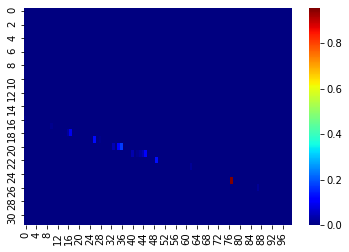

In [ ]:
target=np.zeros((500,100,32))
target1=np.zeros((500,32,100))
for i in range(500):
  for j in range(50):
    target[i][j]=c[i][j]
  for j in range(50,100):
    target[i][j]=y_test[i][j-50]
for i in range(500):
  target1[i]=target[i].transpose()
np.save('/content/drive/My Drive/Machine Learning Data/targ/target.npy', target1)
cmap = plt.get_cmap('jet') 
sns.heatmap(target1[20], cmap=cmap)

# New section

In [ ]:

n_timesteps=50
n_features=32
#inputs=Input(shape=(128,128))
#batch_size=32
#model=Sequential()
#model.add(Conv1D(300,1,activation='relu',input_shape=(128,128)))
#model.add(LSTM(400, activation='relu', input_shape=(128,128), return_sequences=False))
#model.add(RepeatVector(128))
#model.add(LSTM(200, activation='relu', return_sequences=True))
#model.add(SeqSelfAttention(attention_activation='softmax'))
#model.add(TimeDistributed(Dense(128)))
#model=Conv1D(filters = 128, kernel_size = 1, activation = 'sigmoid')(inputs)
#model=MaxPooling1D(pool_size = 2)(model)#池化层
#model=Dropout(dropout)(model)#droupout层
#model=Bidirectional(LSTM(lstm_units, activation='tanh'), name='bilstm')(model)LSTM
#attention=Dense(lstm_units*2, activation='sigmoid', name='attention_vec')(model)Attention
#model=Multiply()([model, attention])#attention
#outputs = Dense(128, activation='softmax')(model)
#model = Model(inputs=inputs, outputs=outputs)
#####..................editted........................#############
query_input = Input(shape=(n_timesteps,n_features))
value_input = Input(shape=(None,), dtype='int32')
token_embedding =Embedding(max_tokens, dimension)
query_embeddings = token_embedding(query_input)
value_embeddings = token_embedding(value_input)

TypeError: ignored

In [ ]:
######diff model###########################
#x_train=x_train.reshape(100,128,128,1)
#x_test=x_test.reshape(40,128,128,1)
#y_train=y_train.reshape(100,128,128,1)
#y_test=y_test.reshape(40,128,128,1)
n_timesteps=50
n_features=32
#inputs=Input(shape=(128,128))
optimizer = tf.keras.optimizers.Adam(lr=1e-6,clipnorm=0.5)

model=Sequential()
model.add(Activation('softmax',input_shape=(n_timesteps,n_features,1)))
#model.add(BatchNormalization())
model.add(TimeDistributed(Conv1D(filters=9,kernel_size=3,activation='relu')))
model.add(BatchNormalization())
#model.add(TimeDistributed(MaxPoolingID(pool_size=2)
model.add(TimeDistributed(Flatten()))
model.add(LSTM(32,activation='relu',stateful=False,return_sequences=True))
model.add(LSTM(32,activation='relu',stateful=False,return_sequences=True))
#attention=Dense(256, activation='sigmoid', name='attention_vec')
#model=Multiply()([model, attention])#attention

#model.add(LSTM(128,activation='relu',stateful=False,return_sequences=True))
model.add(Dense(32,activation='linear'))
model.add(Activation('softmax'))
model.compile(optimizer=optimizer,loss='kld',metrics=['msle','mape','acc'])
model.summary()

NameError: ignored

In [ ]:
x_train=x_train.reshape(2000,50,32,1)
x_test=x_test.reshape(500,50,32,1)
history=model.fit(x_train, y_train,50,epochs=100,shuffle=True,validation_data=(x_test, y_test)) 
model.summary()

Epoch 1/100
40/40 [==============================] - 5s 117ms/step - loss: 0.0390 - msle: 0.0011 - mape: 28607356.0000 - acc: 0.0190 - val_loss: 0.0394 - val_msle: 0.0011 - val_mape: 28844902.0000 - val_acc: 0.0446
Epoch 2/100
40/40 [==============================] - 4s 112ms/step - loss: 0.0390 - msle: 0.0011 - mape: 28607358.0000 - acc: 0.0190 - val_loss: 0.0394 - val_msle: 0.0011 - val_mape: 28842330.0000 - val_acc: 0.0446
Epoch 3/100
40/40 [==============================] - 4s 112ms/step - loss: 0.0390 - msle: 0.0011 - mape: 28607364.0000 - acc: 0.0190 - val_loss: 0.0394 - val_msle: 0.0011 - val_mape: 28840414.0000 - val_acc: 0.0446
Epoch 4/100
40/40 [==============================] - 5s 116ms/step - loss: 0.0390 - msle: 0.0011 - mape: 28607356.0000 - acc: 0.0190 - val_loss: 0.0395 - val_msle: 0.0011 - val_mape: 28838930.0000 - val_acc: 0.0446
Epoch 5/100
40/40 [==============================] - 5s 114ms/step - loss: 0.0390 - msle: 0.0011 - mape: 28607360.0000 - acc: 0.0190 - val_l

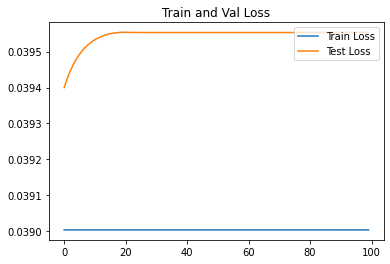

In [ ]:

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(100)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Test Loss')
plt.legend(loc='upper right')
plt.title('Train and Val Loss')
plt.show()


In [ ]:

#y_train_predict=model.predict(np.array(x_train))
#y_train_predict=y_train_predict[:,0]
#draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_train_predict)],axis=1)
#draw.iloc[200:500,0].plot(figsize=(12,6))
#draw.iloc[200:500,1].plot(figsize=(12,6))
#plt.legend(('real', 'predict'),fontsize='15')
#plt.title("Train Data",fontsize='30') #添加标题

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("/content/drive/My Drive/Machine Learning Data/Predictions/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/My Drive/Machine Learning Data/Predictions/model.h5")
print("Saved model")

Saved model


In [ ]:
i=0;

for x,y in range(len(x_test)): #if the generator doesn't have y, use only "for x in..."
    predictions = model.predict(x_test)
    numpy.save('predictions/prediction' + str(i) +".npy", predictions)
    i+=1

    if i == maximumPredictions:
        break;
Loading and processing

files = [name for name in os.listdir('predictions')]
for file in files:
    prediction = numpy.load('predictions/"+file)

    #do what you want with the loaded predictions. 

In [ ]:

#y_train_predict=model.predict(x_train)
#y_test_predict=model.predict(x_test)
#y_test_predict=y_test_predict[:,0]
#draw=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_test_predict)],axis=1);
#draw.iloc[200:500,0].plot(figsize=(12,6))
#draw.iloc[200:500,1].plot(figsize=(12,6))
#plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
#plt.title("Test Data",fontsize='30') 
x=c=np.zeros((400,128,128))
for i in range(1600,2000):
  df=np.load("/content/drive/My Drive/Machine Learning Data/data_gen/input%s.npy" %i)
  x[i-1600]=df.transpose()
  c[i-1600]=df.transpose()

In [ ]:
print(y_pred.shape)

(500, 50, 32)


In [ ]:

#def mape(y_true, y_pred):
 #   return np.mean(np.abs((y_pred - y_true) / y_true)) * 100
#def up_down_accuracy(y_true, y_pred):
 #   y_var_test=y_true[1:]-y_true[:len(y_true)-1]#实际涨跌
  #  y_var_predict=y_pred[1:]-y_pred[:len(y_pred)-1]#原始涨跌
   # txt=np.zeros(len(y_var_test))
    #for i in range(len(y_var_test-1)):#计算数量
     #   txt[i]=np.sign(y_var_test[i])==np.sign(y_var_predict[i])
    #result=sum(txt)/len(txt)
    #return result
#print('MAE/MSE/MAPE/)
#print(mean_absolute_error(y_train_predict, y_train))
#print(mean_squared_error(y_train_predict, y_train) )
#print(mape(y_train_predict, y_train) )
#print(up_down_accuracy(y_train_predict,y_train))
#print('MAE/MSE/MAPE/')
#print(mean_absolute_error(y_test_predict, y_test))
#print(mean_squared_error(y_test_predict, y_test) )
#print(mape(y_test_predict,  y_test) )
#print(up_down_accuracy(y_test_predict,y_test))

In [ ]:
#x_train=x_train.reshape(1600,128,128)
#x=x.reshape(400,128,128,1)
z=np.zeros((500,100,32))
dat=np.zeros((500,32,100))
#v=np.zeros((80,256,128))
for i in range(500):
  c[i]=softmax(c[i])
y_pred=model.predict(x_test)
for i in range(500):
  for j in range(50):
    z[i][j]=c[i][j]
  for j in range(50,100):
    z[i][j]=y_pred[i][j-50]
for i in range(500):
  dat[i]=z[i].transpose()
np.save('/content/drive/My Drive/Machine Learning Data/targ/predictions.npy' , dat)
  
  #np.save('inputs.npy', real_val_x)
  #np.save('targets.npy', real_val_y)
  #np.save('train-loss.npy', loss)
#print(z.shape)
  

#cmap = plt.get_cmap('jet') 
#for i in range (1,1,10):




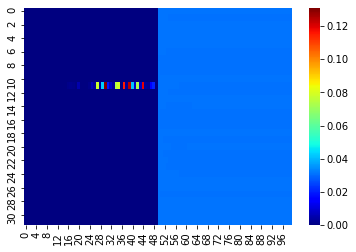

In [ ]:
cmap = plt.get_cmap('jet') 
sns.heatmap(dat[2], cmap=cmap)

In [ ]:
arr2= np.load('/content/drive/My Drive/Machine Learning Data/targ/target1.npy')
for i in range(20):
  target_set[i]=arr1[i].transpose()
cmap = plt.get_cmap('jet') 
sns.heatmap(target_set[1], cmap=cmap)  

FileNotFoundError: ignored

In [ ]:
np.save('train-acc.npy', acc)
np.save('validation-loss.npy', val_loss)
np.save('validation-acc.npy', val_acc)
cmap = plt.get_cmap('jet')
sns.heatmap(data[1], cmap=cmap)
plt.show()

NameError: ignored

In [ ]:
#inputs = np.load('inputs.npy').reshape((400,128,128))
#targets = np.load('targets.npy').reshape((400,128,128))

arr1= np.load('/content/drive/My Drive/Machine Learning Data/targ//predictions5.npy')
arr2= np.load('/content/drive/My Drive/Machine Learning Data/targ/target5.npy')
train_set=target_set=np.zeros((20,128,256))
for i in range(20):
  target_set[i]=arr1[i].transpose()
  train_set[i]=arr2[i].transpose()
  #train_set = np.concatenate((inputs, targets), axis=2)
  #target_set = np.concatenate((inputs, preds), axis=2)
error = abs(train_set-target_set).sum(axis=(1,2))
min_index = np.where(error==np.sort(error)[10])[0][0]
idx = np.where(np.isin(error, np.sort(error)[20:100]))[0]
indexes = idx
  # min_index = 50
#print(error.shape)
for i in range(20):
  cmap = plt.get_cmap('jet')
  fig, ax = plt.subplots(nrows=3, figsize=(9,10))
  fig.subplots_adjust(hspace=0.5)
  fig.suptitle('Predictions', fontsize=16)

  ax[0].set(xlabel='t', ylabel='x', title='Input and Target : u(x,t)')
  sns.heatmap(train_set[i], cmap=cmap, vmin=train_set.min(), vmax=train_set.max(), ax=ax[0])
  ax[1].set(xlabel='t', ylabel='x', title='Input and Prediction : u(x,t)')
  sns.heatmap(target_set[i], cmap=cmap, vmin=train_set.min(), vmax=train_set.max(), ax=ax[1])
  cmap = plt.get_cmap('OrRd')
  ax[2].set(xlabel='t', ylabel='x', title='Input and Error : u(x,t)')
  error = abs(train_set[i]-target_set[i])
  sns.heatmap(error, cmap=cmap, ax=ax[2])

In [ ]:
import random
#samp = pickle.load(open(data_files,'rb'))
#ntrain = cfg.WINDOW_HEIGHT #50, 50; training time-series length
#Ttrain = cfg.T_START   #0; start time from data
#Ttarg = Ttrain+ntrain  #50
preds1 = np.load('/content/drive/My Drive/predictions/predictions0.npy')
preds2 = np.load('/content/drive/My Drive/predictions/predictions1.npy')
arr1=arr2=np.zeros((25,128,256))
for i in range(25):
  arr1[i]=preds1[i].transpose()
  arr2[i]=preds2[i].transpose()
samp= np.concatenate((arr1,arr2), axis=0)
print(samp.shape)
cmap = plt.get_cmap('jet')
fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(20,15))
i=0
for train_set in samp[random.sample(range(len(samp)), 25)]:
  sns.heatmap(train_set, ax=ax[int(i/5)][i%5], cmap=cmap)
  i+=1

FileNotFoundError: ignored